## Preprocessing of Raw Data


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
review_data = pd.read_csv("Reviews.csv")
review_data.shape

(568454, 10)

In [43]:
review_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


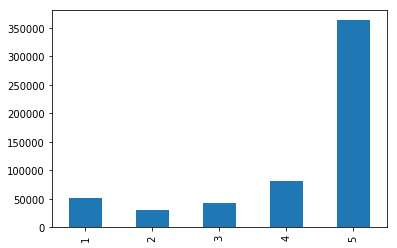

In [44]:
review_data.Score.value_counts().sort_index().plot(kind='bar');

**Conclusion** : We have very much High rating as compare to Low rating.
so much less Low rating reviews as compare to High rating reviews.

In [45]:
#Review with Score Greater or equal to four

temp = review_data[review_data.Score >=4]
for i in range(5):
    print("Rating: ",temp.Score.iloc[i])
    print("Review: ",temp.Text.iloc[i],'\n')

Rating:  5
Review:  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. 

Rating:  4
Review:  This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch. 

Rating:  5
Review:  Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal. 

Rating:  4
Review: 

In [46]:
#Review with Score Smaller or equal to two

temp = review_data[review_data.Score <=2]
for i in range(5):
    print("Rating: ",temp.Score.iloc[i])
    print("Review: ",temp.Text.iloc[i],'\n')

Rating:  1
Review:  Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". 

Rating:  2
Review:  If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal. 

Rating:  1
Review:  My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat. 

Rating:  2
Review:  I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like

**Conclusion** : By looking at above sample we assume 5,4 rating reviews is mainly positive review and 1,2 is mainly negative reviews.

## Data Cleaning and wrangling

In [47]:
# Remove duplicates Reviews

review_data = review_data.sort_values(by=['UserId','ProfileName','Time','Text'])
review_data = review_data.drop_duplicates(subset=['UserId','ProfileName','Time','Text'],keep = 'first',inplace = False)
review_data.shape

(393933, 10)

In [48]:
review_data.Text.values[0]

"I have to say I was a little apprehensive to buy this product for the price, but I like to keep my K-Cup price under $0.50 and Sam's Club was sold out at the time, and I tried this.  The Fuhgeddaboudit is very strong, but that's how I like it.  Overall, I was impressed."

Negative Sentiment Percentage in dataset :  15.68 %
Postive Sentiment Percentage in dataset :  84.32 %
data Shape (364164, 2)


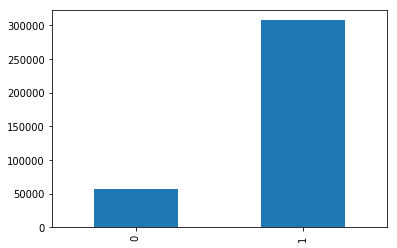

In [49]:
# creating sentiment feature

review_data['Sentiment'] = [1 if x in (4,5) else 0 if x in(1,2) else 2 for x in review_data['Score']]
review_data = review_data[review_data.Sentiment!=2] # remove neutral reviews
review_data = review_data.filter(["Text","Sentiment"])
review_data.Sentiment.value_counts().sort_index().plot(kind='bar',)
temp = review_data.Sentiment.value_counts()
print("Negative Sentiment Percentage in dataset : ",round((temp[0]/temp.sum())*100,2),'%')
print("Postive Sentiment Percentage in dataset : ",round((temp[1]/temp.sum())*100,2),'%')
print('data Shape',review_data.shape)



In [0]:
#Save preprocessed data
review_data.to_pickle("review_data.pkl")  # where to save it, usually as a .pkl
# review_data = pd.read_pickle(review_data.pkl) #load save .pkl file